In [1]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

data = pd.read_csv('/content/milk_production_dataset.csv')

print(data.shape)
data.head()



(170, 2)


,Month,Monthly milk production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    169 non-null    object 
 1   Monthly milk production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [4]:
data.head(50)

,Month,Monthly milk production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [5]:
# set the month column as the index of the pandas dataframe

data.set_index('Month',inplace=True)

data.head()

,Monthly milk production
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


Index(['Monthly milk production'], dtype='object')


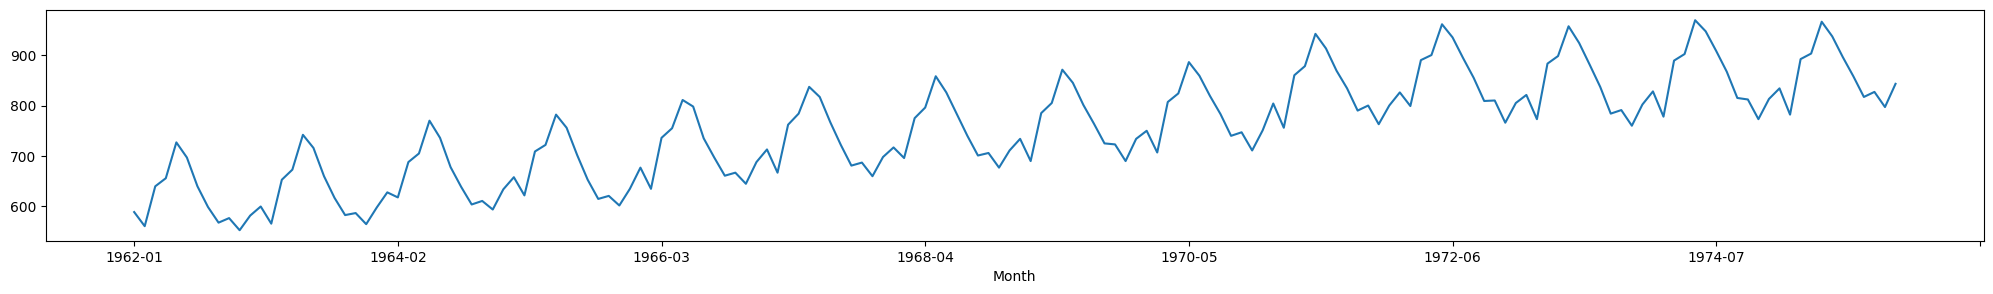

In [21]:
import matplotlib.pyplot as plt
# visualise the data
# Check for typos in the column name and use the correct one
data['Monthly milk production'].plot(figsize=(25,3))
# If you are still unsure of the column name, print them out to verify
print(data.columns)

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is already defined and loaded with appropriate data
tempData = data['Monthly milk production'] # Use the correct column name
OrigData = tempData.copy()

# Handle missing values
tempData = tempData.dropna()  # Option 1: Drop missing values
# or
# tempData = tempData.fillna(method='ffill')  # Option 2: Forward fill missing values
# tempData = tempData.fillna(method='bfill')  # Option 3: Backward fill missing values

# Perform seasonal decomposition
var = seasonal_decompose(tempData, model='additive')  # or model='multiplicative'

# Plot the decomposition
plt.figure(figsize=(8, 10))

plt.subplot(2, 2, 1)
plt.plot(var.observed)
plt.title('Original Plot')

plt.subplot(2, 2, 2)
plt.plot(var.trend)
plt.title('Trend Identification')

plt.subplot(2, 2, 3)
plt.plot(var.seasonal)
plt.title('Seasonality Identification')

plt.subplot(2, 2, 4)
plt.plot(var.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None